# Decision Tree Model


In [8]:
#importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [9]:
#Loading Datasets from github link to Dataframe
X_test = pd.read_csv('https://raw.githubusercontent.com/savigaur2/CS-4372/main/HW2/X_test.csv')
X_train = pd.read_csv('https://raw.githubusercontent.com/savigaur2/CS-4372/main/HW2/X_train.csv')

y_test = pd.read_csv('https://raw.githubusercontent.com/savigaur2/CS-4372/main/HW2/y_test.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/savigaur2/CS-4372/main/HW2/y_train.csv')

*** Getting the base Decision Tree Model ***

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

In [11]:
#getting basic metrics
print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        29
           1       0.75      0.66      0.70        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.70        61

Predicted labels:  [0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0]
Accuracy:  0.7049180327868853


In [12]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


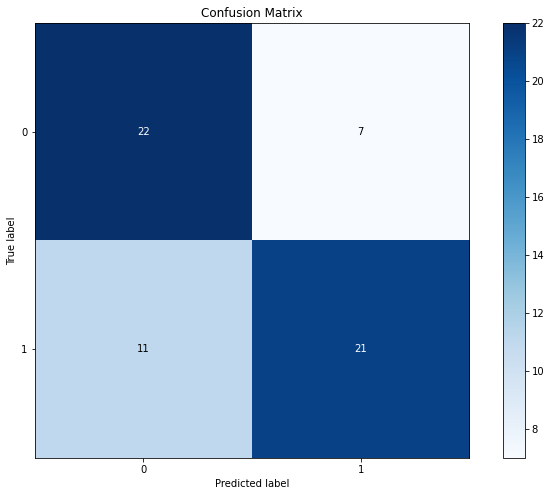

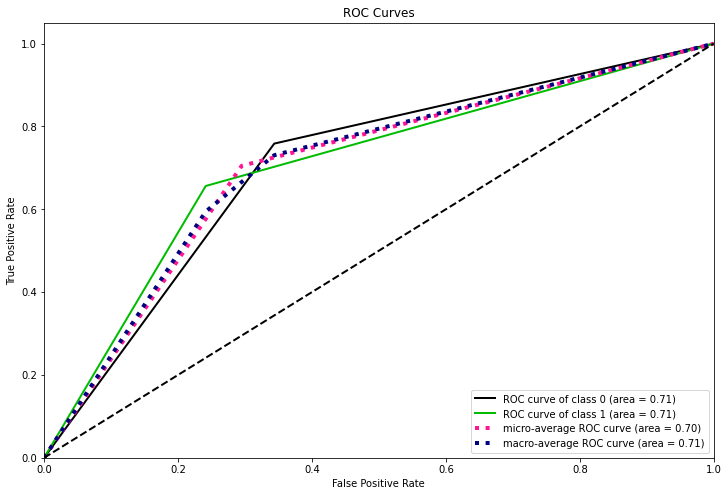

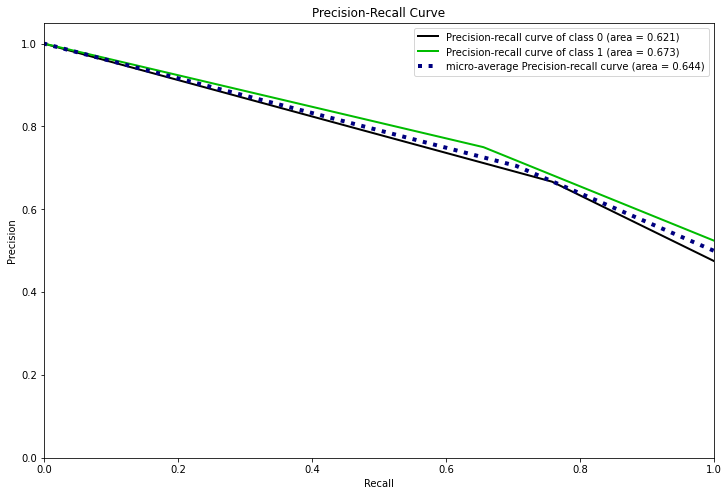

In [13]:
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

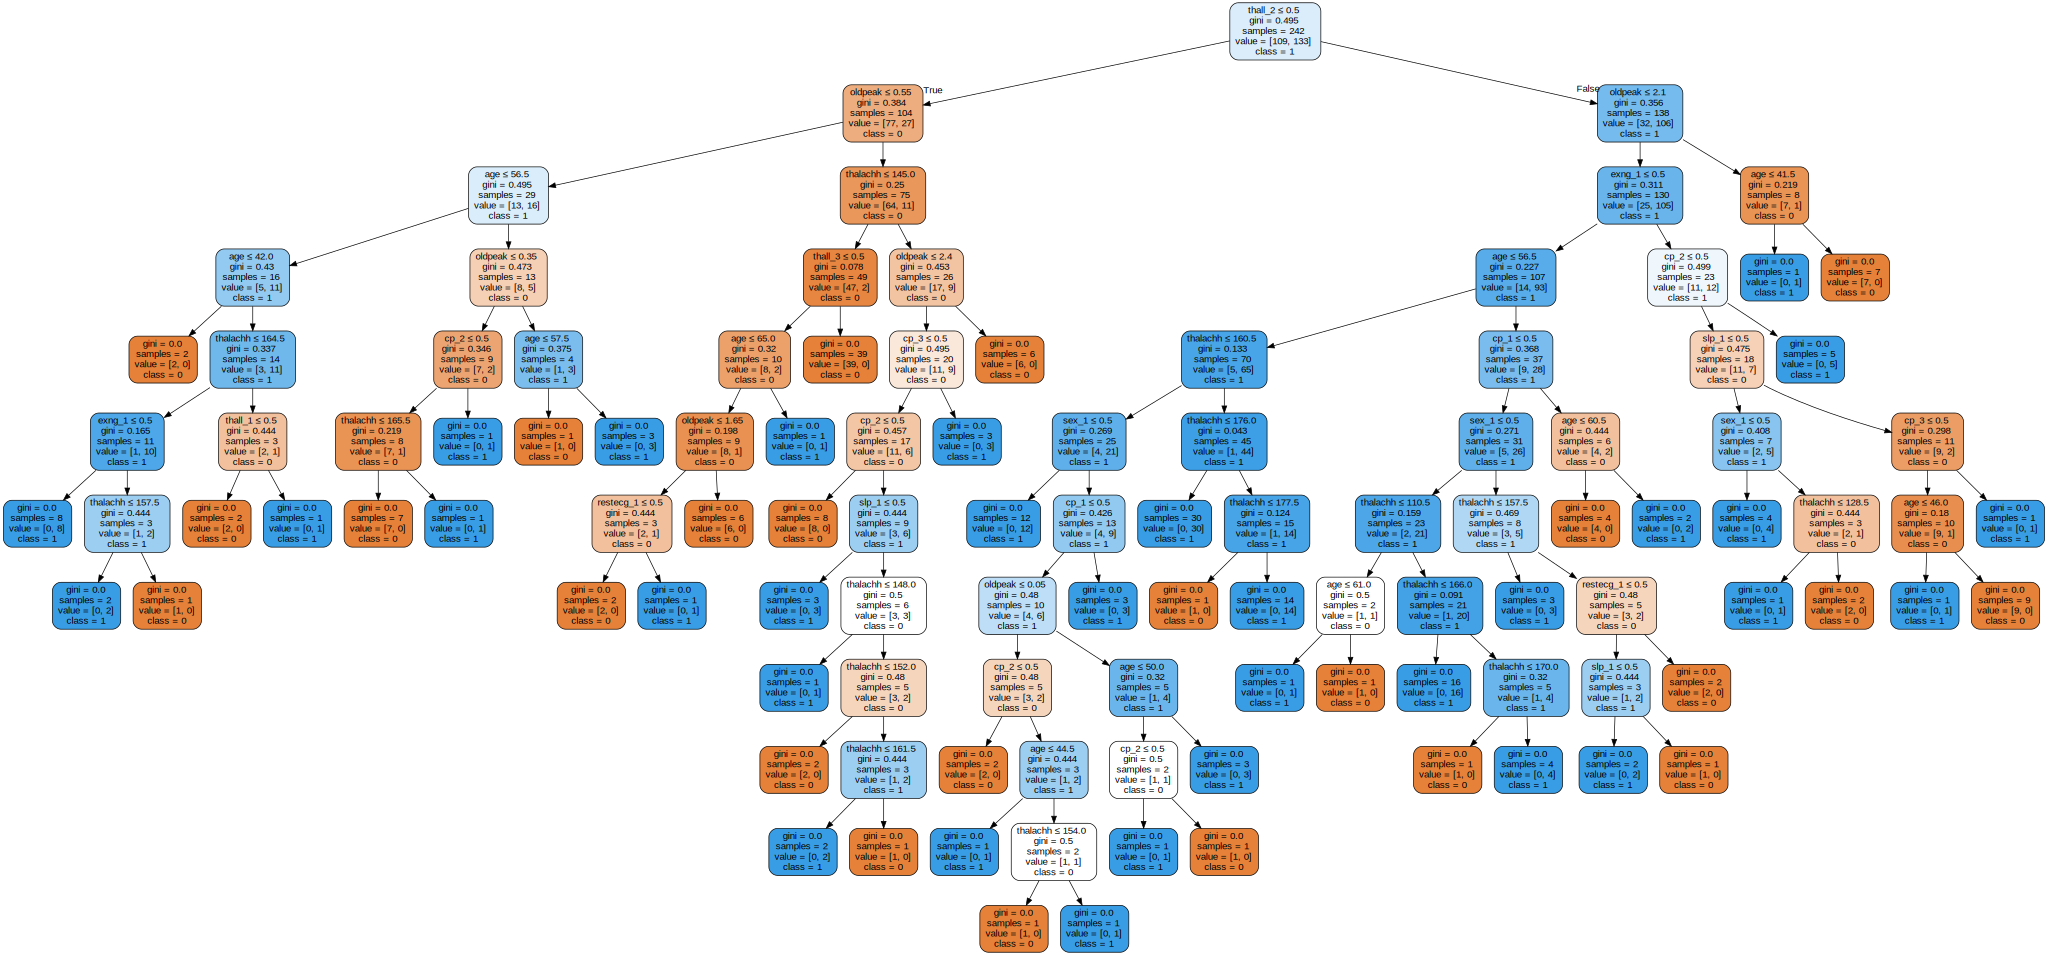

In [17]:
from matplotlib.pylab import rcParams

#Visualization 
import graphviz 
from sklearn import tree
rcParams['figure.figsize'] = 12, 8
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names = X_train.columns,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True
                     )  
size="0"
graph = graphviz.Source(dot_data)  

graph

*** Parameter Grid Builder for Parameter Tuning ***

In [ ]:
#importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#search cv
decisionTree = DecisionTreeClassifier()
params = {
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}

grid = GridSearchCV(decisionTree,
                    param_grid = params,
                    cv=10, 
                    verbose=10,
                    n_jobs=2
                    )

grid.fit(X_train, y_train)
         

In [ ]:
#best grid
grid.best_params_
grid.best_score_

In [ ]:
def evaluate_model (model, y_pred, y_probs, visualize = True, tuned = False):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score: ', accuracy)

    print(classification_report(y_test, y_pred))

    skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    skplt.metrics.plot_roc(y_test, y_probs)
    skplt.metrics.plot_precision_recall_curve(y_test, y_probs)

    if not tuned:
        plot_feature_importances(model, feature_names = X_test.columns)

In [ ]:
y_pred = grid.predict(X_test)
y_probs = grid.predict_proba(X_test)

In [ ]:
#getting metrics for new model
evaluate_model(grid, y_pred, y_probs, visualize = False, tuned = True)

In [ ]:
#Visualization 
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
                     feature_names = X_train.columns,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph